In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('../data/processed/data.csv', index_col=0)
data.iloc[250:300][['diff_markets_RE', 'diff_markets_RE_hourly_rollavg']]

,diff_markets_RE,diff_markets_RE_hourly_rollavg
250,-10.36,-0.740000
251,-10.91,2.034000
252,-1.69,1.468000
253,-4.50,-1.593000
254,0.00,0.215000
255,0.00,-8.521000
256,0.00,-7.213000
257,0.00,1.350000
258,0.00,4.860000
259,0.00,7.517000


In [3]:
data.columns

Index(['datetime', 'load_FC', 'load_RE', 'Solar_FC', 'Wind_offshore_FC',
       'Wind_onshore_FC', 'DK1_Accepted_Down_Volume_(MW)',
       'DK1_Accepted_Up_Volume_(MW)', 'DK1_Imbalance_Price_(EUR)',
       'DK2_Accepted_Down_Volume_(MW)', 'DK2_Accepted_Up_Volume_(MW)',
       'lambda_IM', 'Biomass_RE', 'Fossil_Gas_RE', 'Fossil_Hard_coal_RE',
       'Fossil_Oil_RE', 'Solar_RE', 'Waste_RE', 'Wind_offshore_RE',
       'Wind_onshore_RE', 'lambda_DA_RE', 'lambda_DA_FC', 'energy_RE',
       'energy_FC', 'missing_capacity_RE', 'diff_markets_RE',
       'abs_diff_markets_RE', 'system_state_RE', 'date',
       'lambda_DA_FC_normalized',
       'lambda_DA_FC_zeta_1.0_mu_-0.37961439398567787',
       'lambda_DA_FC_zeta_1.0_mu_0.02682140396829682',
       'lambda_DA_FC_zeta_1.0_mu_0.3542880027276621',
       'energy_FC_zeta_0.3550017391908838_mu_0.11874412244809437',
       'energy_FC_zeta_0.3550017391908838_mu_0.39136321503461935',
       'energy_FC_zeta_0.3550017391908838_mu_0.8015558154203456',

In [4]:
data['datetime'] = pd.to_datetime(data['datetime'], utc=True).dt.tz_convert('Europe/Berlin')

In [5]:
data['diff_markets_RE'].describe()
#data['abs_Imbalance_difference'].describe()

count    17416.000000
mean         1.009802
std         27.587909
min       -190.890000
25%         -5.640000
50%          0.000000
75%          0.000000
max        709.750000
Name: diff_markets_RE, dtype: float64

In [6]:
positive_system_state = data[data['system_state_RE'] == -1]
negative_system_state = data[data['system_state_RE'] == 1]
positive_system_state.describe()

,load_FC,load_RE,Solar_FC,Wind_offshore_FC,Wind_onshore_FC,DK1_Accepted_Down_Volume_(MW),DK1_Accepted_Up_Volume_(MW),DK1_Imbalance_Price_(EUR),DK2_Accepted_Down_Volume_(MW),DK2_Accepted_Up_Volume_(MW),...,energy_FC_error,lambda_IM_hourly_rollavg,lambda_DA_RE_hourly_rollavg,missing_capacity_RE_hourly_rollavg,diff_markets_RE_hourly_rollavg,abs_diff_markets_RE_hourly_rollavg,load_FC_error_hourly_rollavg,Solar_FC_error_hourly_rollavg,Wind_offshore_FC_error_hourly_rollavg,Wind_onshore_FC_error_hourly_rollavg
count,7159.000000,7159.000000,7159.000000,7159.00000,7159.000000,7159.000000,7159.000000,7159.000000,7159.000000,7159.000000,...,7159.000000,7159.000000,7159.000000,7159.000000,7159.000000,7159.000000,7159.000000,7159.000000,7159.000000,7159.000000
mean,3865.642688,3864.017461,136.176421,731.18145,1277.568515,1505.497835,787.104624,19.531833,167.397542,828.789077,...,-0.004559,34.672005,33.832203,758.603152,0.839802,11.142338,1.741285,0.255976,8.772519,32.978907
std,720.451316,719.605546,212.345235,419.57106,894.399292,643.065217,228.392050,17.124333,107.183839,133.408293,...,0.139971,13.751878,12.104950,543.244803,5.563147,7.104456,32.051145,24.099993,54.545699,121.011407
min,2357.000000,1693.000000,0.000000,0.00000,20.000000,235.000000,376.000000,-131.820000,0.000000,446.000000,...,-0.990196,-16.010000,-28.930000,298.000000,-22.238966,0.000000,-160.357143,-145.793103,-162.000000,-2658.000000
25%,3276.000000,3269.000000,0.000000,353.00000,537.500000,969.500000,602.500000,4.000000,79.000000,697.000000,...,-0.071543,25.215167,25.351356,351.308333,-2.272500,5.922833,-19.810714,-0.896429,-26.750000,-27.610345
50%,3861.000000,3845.000000,8.000000,744.00000,1097.000000,1485.000000,751.000000,20.500000,155.000000,823.000000,...,0.000000,34.735862,34.533333,493.733333,-0.026786,9.157857,1.300000,0.000000,-3.433333,10.700000
75%,4446.000000,4428.500000,202.000000,1107.00000,1903.000000,1985.000000,929.000000,34.200000,235.000000,947.000000,...,0.058882,43.423000,42.018000,1040.035057,3.315083,14.610667,19.700000,3.533333,28.433333,79.593103
max,5724.000000,9618.000000,911.000000,1511.00000,4300.000000,3465.000000,2579.000000,97.370000,650.000000,1265.000000,...,0.965686,101.597000,83.140667,2548.241379,71.930000,71.930000,161.750000,121.600000,203.133333,553.571429


In [7]:
negative_system_state.describe()

,load_FC,load_RE,Solar_FC,Wind_offshore_FC,Wind_onshore_FC,DK1_Accepted_Down_Volume_(MW),DK1_Accepted_Up_Volume_(MW),DK1_Imbalance_Price_(EUR),DK2_Accepted_Down_Volume_(MW),DK2_Accepted_Up_Volume_(MW),...,energy_FC_error,lambda_IM_hourly_rollavg,lambda_DA_RE_hourly_rollavg,missing_capacity_RE_hourly_rollavg,diff_markets_RE_hourly_rollavg,abs_diff_markets_RE_hourly_rollavg,load_FC_error_hourly_rollavg,Solar_FC_error_hourly_rollavg,Wind_offshore_FC_error_hourly_rollavg,Wind_onshore_FC_error_hourly_rollavg
count,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,4267.000000,...,4267.000000,4263.000000,4263.000000,4263.000000,4263.000000,4263.000000,4263.000000,4263.000000,4263.000000,4263.000000
mean,3847.823764,3845.072182,109.101945,692.767753,1191.906726,1385.987110,803.110851,49.881123,161.731193,814.533865,...,-0.002049,36.047344,34.932318,773.911749,1.115025,10.515335,0.984629,0.246049,9.347972,23.563749
std,724.025506,718.044956,179.079427,414.681799,917.933201,597.715261,253.323050,49.123835,102.636591,133.690166,...,0.138210,13.395360,11.564973,537.418531,5.241841,6.779856,31.238998,22.481288,58.147000,99.567173
min,2385.000000,2368.000000,0.000000,0.000000,14.000000,218.000000,341.000000,-60.300000,0.000000,495.000000,...,-0.769608,-26.185000,-26.185000,298.000000,-21.822069,0.000000,-159.642857,-146.000000,-117.633333,-589.800000
25%,3241.500000,3242.000000,0.000000,337.000000,463.500000,907.000000,594.000000,32.000000,80.000000,694.000000,...,-0.068627,27.236552,27.207292,368.633333,-1.926667,5.442333,-19.583333,-0.783333,-28.350000,-33.050575
50%,3833.000000,3812.000000,2.000000,663.000000,946.000000,1346.000000,777.000000,42.300000,145.000000,793.000000,...,0.000000,35.988276,35.251000,509.333333,0.199667,8.664000,0.533333,0.000000,-5.966667,-7.300000
75%,4429.500000,4418.000000,154.500000,1044.000000,1691.000000,1840.500000,951.000000,58.070000,221.000000,928.000000,...,0.059049,44.334167,42.919793,1036.400000,3.281730,14.008793,18.383333,2.237356,25.424138,61.883333
max,5513.000000,5546.000000,853.000000,1519.000000,4156.000000,3198.000000,2369.000000,2016.070000,777.000000,1269.000000,...,0.818627,100.061667,81.905000,2548.413793,36.424333,46.106667,152.464286,123.900000,202.633333,548.035714


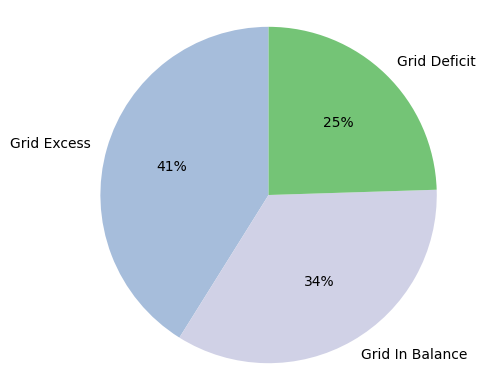

In [8]:
import matplotlib.pyplot as plt

# Define the mapping from numeric codes to human-readable labels
label_map = {
    1: 'Grid Deficit',
    0: 'Grid In Balance',
    -1: 'Grid Excess'
}

# Map the numeric values to labels
labeled_states = data['system_state_RE'].map(label_map)

# Count occurrences
sizes = labeled_states.value_counts()
labels = sizes.index

# Define distinct colors for each state
colors = ['#a6bddb', '#d0d1e6', '#74c476']  # Muted blue, soft lavender, fresh green

# Create smaller pie chart while keeping text size consistent
plt.figure(figsize=(5, 4))  # Smaller figure size
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda p: f'{int(round(p))}%',
    startangle=90,
    colors=colors,
    radius=1.0  # Shrinks the pie inside the canvas
)
plt.axis('equal')  # Ensure pie is a circle
plt.tight_layout()
plt.show()


In [9]:
data.shape

(17416, 51)

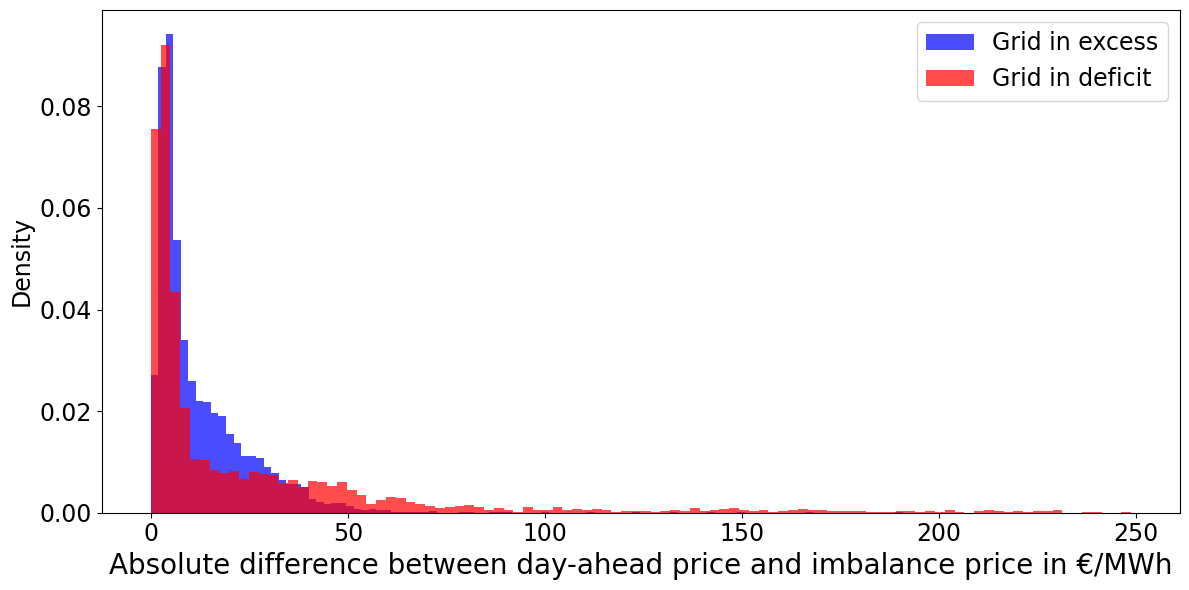

In [22]:
# Filter datasets for plotting
positive_system_state = positive_system_state[positive_system_state['abs_diff_markets_RE'] <= 250]
negative_system_state = negative_system_state[negative_system_state['abs_diff_markets_RE'] <= 250]

# Create histogram plot
plt.figure(figsize=(12, 6))
plt.hist(positive_system_state['abs_diff_markets_RE'], bins=100, color='blue', alpha=0.7, label='Grid in excess', density=True)
plt.hist(negative_system_state['abs_diff_markets_RE'], bins=100, color='red', alpha=0.7, label='Grid in deficit', density=True)

# Labels and legend with consistent font size
plt.xlabel('Absolute difference between day-ahead price and imbalance price in €/MWh', fontsize=20)
plt.ylabel('Density', fontsize=17)
plt.legend(fontsize=17)

# Set tick label sizes
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

plt.tight_layout()
plt.show()


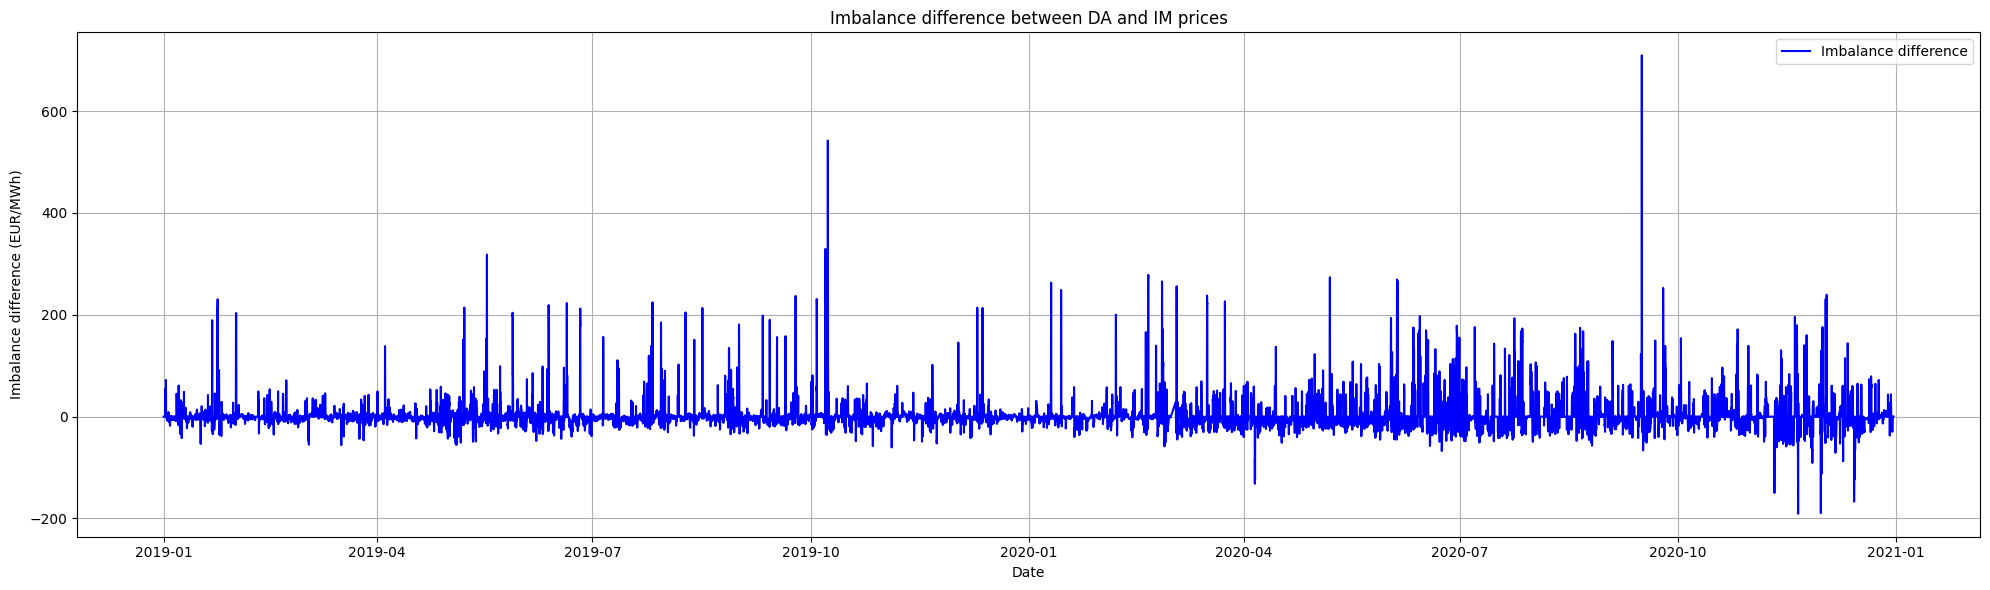

In [11]:
#make plot of imbalance difference only wih matplotlib

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(data['datetime'], data['diff_markets_RE'], color='blue', label='Imbalance difference')
ax.set_title('Imbalance difference between DA and IM prices')
ax.set_xlabel('Date')
ax.set_ylabel('Imbalance difference (EUR/MWh)')
ax.legend()
plt.grid()
plt.tight_layout()
plt.show()


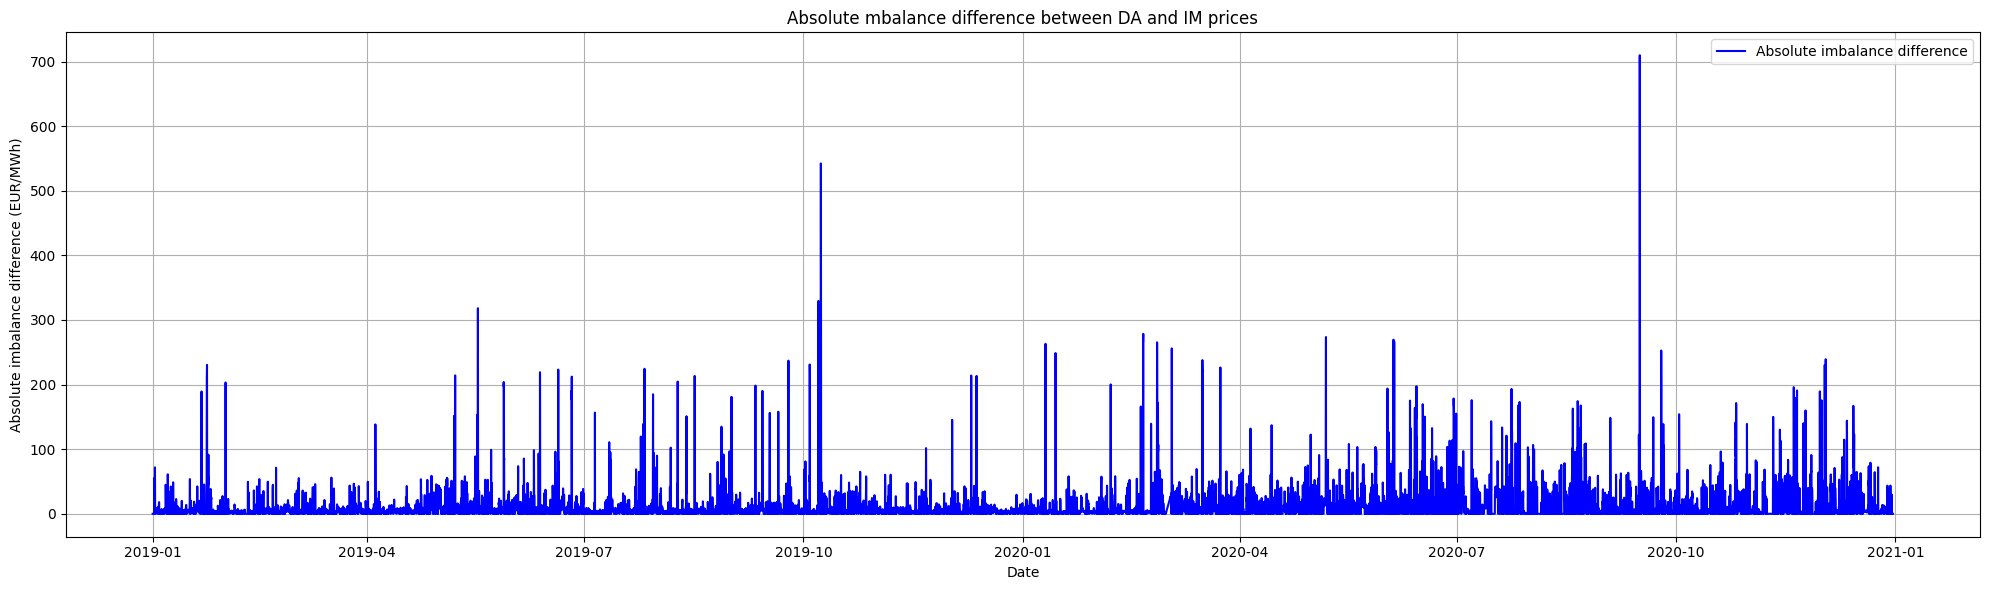

In [12]:
#make plot of imbalance difference only wih matplotlib

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(data['datetime'], data['abs_diff_markets_RE'], color='blue', label='Absolute imbalance difference')
ax.set_title('Absolute mbalance difference between DA and IM prices')
ax.set_xlabel('Date')
ax.set_ylabel('Absolute imbalance difference (EUR/MWh)')
ax.legend()
plt.grid()
plt.tight_layout()
plt.show()

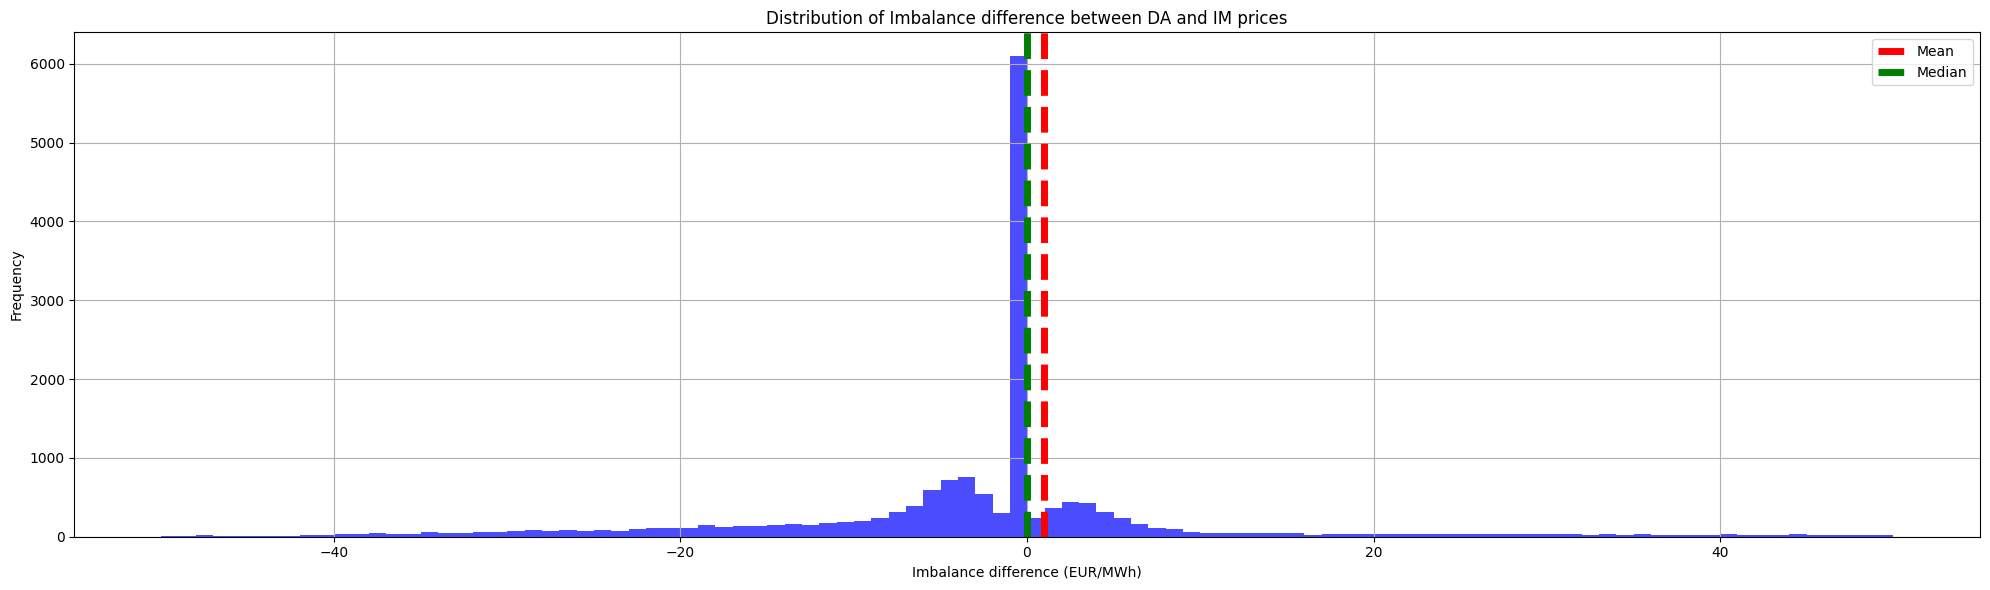

Mean: 1.0098024804777215
Median: 0.0


In [13]:
# make a distribution plot of the imbalance difference
filtered_data = data[(data['diff_markets_RE'] > -50) & (data['diff_markets_RE'] < 50)]
fig, ax = plt.subplots(figsize=(20, 6))
mean = data['diff_markets_RE'].mean()
median = data['diff_markets_RE'].median()
ax.axvline(mean, color='red', linestyle='dashed', linewidth=5, label='Mean')
ax.axvline(median, color='green', linestyle='dashed', linewidth=5, label='Median')
ax.legend()
ax.hist(filtered_data['diff_markets_RE'], bins=100, color='blue', alpha=0.7)
ax.set_title('Distribution of Imbalance difference between DA and IM prices')
ax.set_xlabel('Imbalance difference (EUR/MWh)')
ax.set_ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()
print('Mean:', mean)
print('Median:', median)

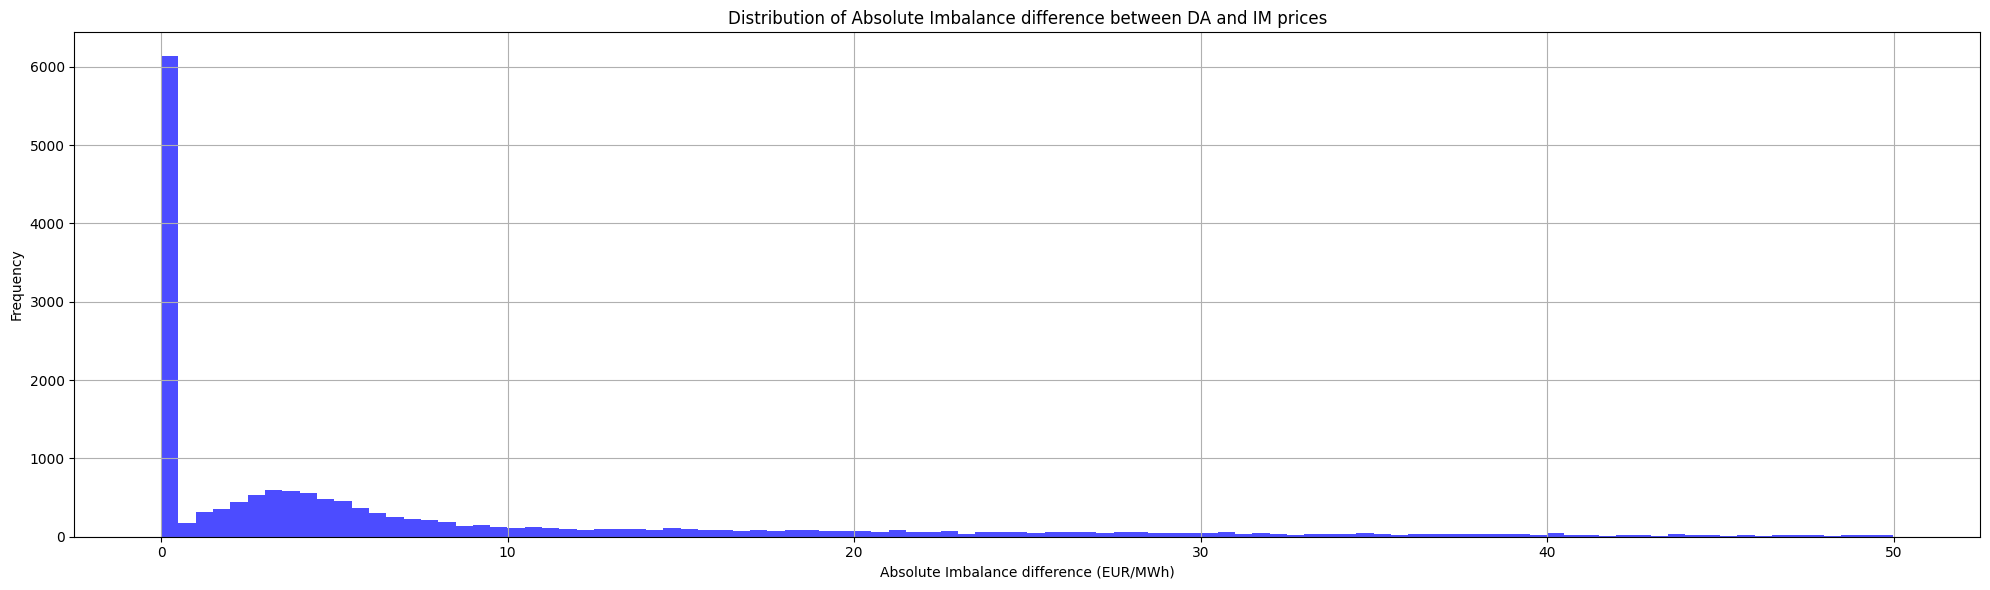

In [14]:
#make a distribution plot of the absolute imbalance difference
fig, ax = plt.subplots(figsize=(20, 6))
ax.hist(filtered_data['abs_diff_markets_RE'], bins=100, color='blue', alpha=0.7)
ax.set_title('Distribution of Absolute Imbalance difference between DA and IM prices')
ax.set_xlabel('Absolute Imbalance difference (EUR/MWh)')
ax.set_ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()

In [15]:
data.columns

Index(['datetime', 'load_FC', 'load_RE', 'Solar_FC', 'Wind_offshore_FC',
       'Wind_onshore_FC', 'DK1_Accepted_Down_Volume_(MW)',
       'DK1_Accepted_Up_Volume_(MW)', 'DK1_Imbalance_Price_(EUR)',
       'DK2_Accepted_Down_Volume_(MW)', 'DK2_Accepted_Up_Volume_(MW)',
       'lambda_IM', 'Biomass_RE', 'Fossil_Gas_RE', 'Fossil_Hard_coal_RE',
       'Fossil_Oil_RE', 'Solar_RE', 'Waste_RE', 'Wind_offshore_RE',
       'Wind_onshore_RE', 'lambda_DA_RE', 'lambda_DA_FC', 'energy_RE',
       'energy_FC', 'missing_capacity_RE', 'diff_markets_RE',
       'abs_diff_markets_RE', 'system_state_RE', 'date',
       'lambda_DA_FC_normalized',
       'lambda_DA_FC_zeta_1.0_mu_-0.37961439398567787',
       'lambda_DA_FC_zeta_1.0_mu_0.02682140396829682',
       'lambda_DA_FC_zeta_1.0_mu_0.3542880027276621',
       'energy_FC_zeta_0.3550017391908838_mu_0.11874412244809437',
       'energy_FC_zeta_0.3550017391908838_mu_0.39136321503461935',
       'energy_FC_zeta_0.3550017391908838_mu_0.8015558154203456',

In [16]:
data

,datetime,load_FC,load_RE,Solar_FC,Wind_offshore_FC,Wind_onshore_FC,DK1_Accepted_Down_Volume_(MW),DK1_Accepted_Up_Volume_(MW),DK1_Imbalance_Price_(EUR),DK2_Accepted_Down_Volume_(MW),...,energy_FC_error,lambda_IM_hourly_rollavg,lambda_DA_RE_hourly_rollavg,missing_capacity_RE_hourly_rollavg,diff_markets_RE_hourly_rollavg,abs_diff_markets_RE_hourly_rollavg,load_FC_error_hourly_rollavg,Solar_FC_error_hourly_rollavg,Wind_offshore_FC_error_hourly_rollavg,Wind_onshore_FC_error_hourly_rollavg
0,2019-01-01 00:00:00+01:00,3216.0,3260.0,0.0,839.0,2854.0,2117.0,996.0,28.32,187.0,...,0.004902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01 01:00:00+01:00,3140.0,3186.0,0.0,955.0,2987.0,2192.0,1002.0,10.07,179.0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01 02:00:00+01:00,3051.0,3070.0,0.0,512.0,2817.0,1524.0,1530.0,-4.08,181.0,...,-0.223514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01 03:00:00+01:00,2951.0,2966.0,0.0,443.0,2729.0,1377.0,1653.0,-9.91,80.0,...,-0.059160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01 04:00:00+01:00,2896.0,2933.0,0.0,437.0,2667.0,1400.0,1669.0,-7.41,82.0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17411,2020-12-30 19:00:00+01:00,4753.0,4733.0,0.0,501.0,561.0,1412.0,491.0,52.32,717.0,...,0.014706,50.658667,44.642667,375.200000,6.016000,20.942000,38.333333,0.0,-0.666667,254.866667
17412,2020-12-30 20:00:00+01:00,4536.0,4436.0,0.0,483.0,579.0,1314.0,531.0,51.13,711.0,...,-0.024688,35.303000,36.816333,375.200000,-1.513333,12.831333,9.500000,0.0,-8.933333,255.933333
17413,2020-12-30 21:00:00+01:00,4281.0,4255.0,0.0,513.0,579.0,1356.0,603.0,45.76,721.0,...,-0.241180,30.784667,34.037000,388.266667,-3.252333,12.781000,4.200000,0.0,-0.433333,261.966667
17414,2020-12-30 22:00:00+01:00,4023.0,3897.0,0.0,490.0,573.0,1179.0,539.0,23.13,738.0,...,0.024510,33.520333,29.230000,392.666667,4.290333,9.351000,17.400000,0.0,22.500000,271.033333


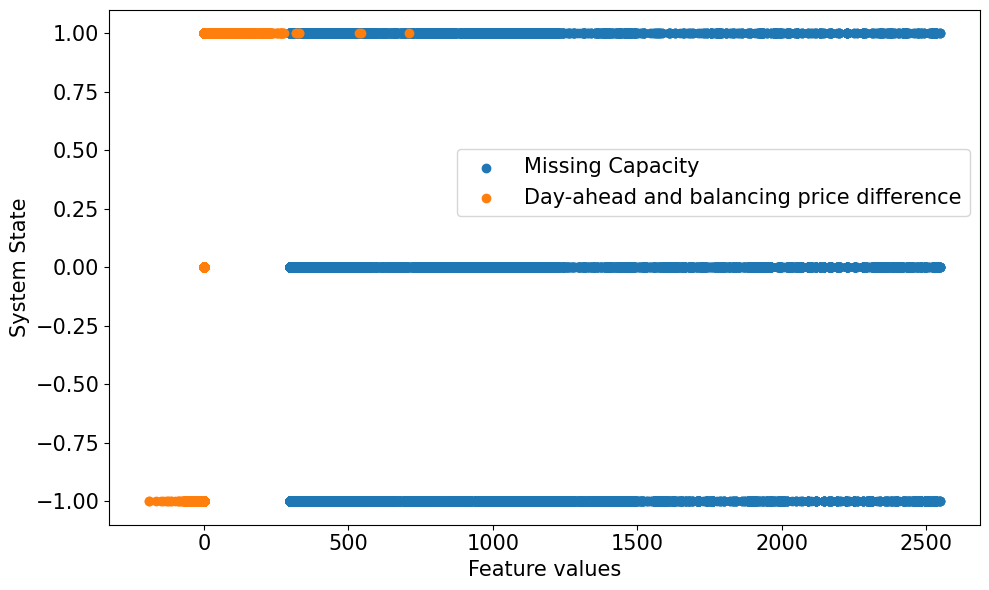

In [25]:
features = ['missing_capacity_RE_hourly_rollavg', 'diff_markets_RE']
labels = ['Missing Capacity', 'Day-ahead and balancing price difference']

plt.figure(figsize=(10, 6))
plt.scatter(data[features[0]], data['system_state_RE'], label=labels[0])
plt.scatter(data[features[1]], data['system_state_RE'], label=labels[1])

# Axis labels with increased font size
plt.xlabel('Feature values', fontsize=15)
plt.ylabel('System State', fontsize=15)

# Ticks font size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Legend with increased font size
plt.legend(fontsize=15, bbox_to_anchor=(1, 0.75))

plt.tight_layout()
plt.show()


In [18]:
features

['missing_capacity_RE_hourly_rollavg', 'diff_markets_RE']

In [19]:
#drop NaN from data
data = data.dropna()

In [20]:
# make a kernel regression to estimate the relationship between the imbalance difference and the other input features using scikit-learn
from sklearn.kernel_ridge import KernelRidge


from sklearn.model_selection import train_test_split
X = data[features]
y = data['Imbalance_difference']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = KernelRidge(kernel='rbf', alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

KeyError: 'Imbalance_difference'

In [ ]:
# do a linear regression as well
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression Mean Squared Error: {mse_linear}')
print(f'Linear Regression R^2 Score: {r2_linear}')

Linear Regression Mean Squared Error: 3.4427773946203025e-27
Linear Regression R^2 Score: 1.0
